In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading DATA
df = pd.read_csv('bezdekIris.csv',header=None)
data = np.array(df)
x_train = np.concatenate((data[:40,:4],data[60:100,:4]),axis=0)
y_train = np.concatenate((data[:40,-1],data[60:100,-1]),axis=0)
N = len(y_train)

def one_hot(y):
	for i in range(len(y)):
		if y[i] == 'Iris-setosa':
			y[i] = 0.0
		else:
			y[i ]= 1.0
	return y
y_train = one_hot(y_train).reshape((N,1))

# Set data type.
# You can '#' it if you want for its insignificance.
y_train = y_train.astype('float')
x_train = x_train.astype('float')


In [4]:
# Set Hyperparameters
# Definition :
# 	nodes: number of neuron 
#	steps: number of iteration
#	alpha: learning rate
#	    N: number of samples in the dataset
np.random.seed(2)
nodes = 6
steps = 1000
alpha = 0.2


# Record loss and accuracy of every training step.
loss_data = np.zeros((steps,1))
accuracy_data = np.zeros((steps,1))


# Define the sigmoid as active function
# SigmoidDerivative() is the sigmoid function's derivative.
def Sigmoid(x):
    return 1 / (1 + np.exp(-x.astype('float')))
def SigmoidDerivative(x):
    return x * (1 - x)

# Initialize weights
# Definition :
# 	'hws' is short for hidden layer weights.
# 	 the same with 'hws', 'ows' is short for output layer weights.
hws = 2*np.random.random((x_train.shape[1] + 1, nodes)) - 1
ows = 2*np.random.random((nodes + 1, y_train.shape[1])) - 1

In [5]:
# Forward Propagation
# Definition :
# 	'out_IL' is short for out of input layer.
# 	'out_HL' is short for out of hidden layer.
# 	'out_OL' is short for out of output layer.
def ForwardPropagation(x,w1,w2,train=True):

	# adding a column of ones for bias as the output of input layer.
	out_IL = np.hstack((np.ones((x.shape[0],1)),x))

	# This step calculate z = b*1 + w1*x1 + w2*x2 + w3*x3 + w4*x4 
	out_HL =  np.dot(out_IL, w1)
	# feed z into active function and get out_HL as the output of hidden layer.
	out_HL = Sigmoid(out_HL)

	# Now pass out_HL as input data to output layer.
	# I think you should know what would be done by the next codes.
	out_HL = np.hstack((np.ones((x.shape[0], 1)),out_HL))
	out_OL = np.dot(out_HL, w2)

	if train:
		return out_IL,out_HL,out_OL
	else:
		return out_OL

# Forward Propagation
# Definition :
# 	'oe' is short for output layer error.
# 	'he' is short for hidden layer error.
# 	'd_hws' is short for derivative of hidden layer weights.
# 	'd_ows' is short for derivative of output layer weights.
# Here, backward propagation is not as straightforward as forward propagation.
def BackwardPropagation(y_hat,y):
	oe = y_hat - y
	he = SigmoidDerivative(out_HL[:, 1:]) * np.dot(oe, ows.T[:, 1:])

	d_HL = out_IL[:, :, np.newaxis] * he[: , np.newaxis, :]
	d_hws = np.average(d_HL,axis=0)

	d_OL = out_HL[:, :, np.newaxis] * oe[:, np.newaxis, :]
	d_ows = np.average(d_OL,axis=0)

	return d_hws,d_ows

# Cost
# I think there is nothing need to illustrate.
def Cost(y_hat,y,train=True):
	loss = np.sum(np.square(y_hat - y))
	print('Loss:{}'.format(loss))
	loss_data[i] = loss

	y_hat = (y_hat>=0.5)
	y = (y == 1.0)
	accuracy = np.sum((y_hat == y))
	print('Accuracy:{}%'.format((accuracy/N)*100))
	accuracy_data[i] = accuracy

	if train:
		return loss_data,accuracy_data
	else:
		pass


In [6]:

# Training LOOP
for i in range(steps):
	print('------------Iterative',str(i),'------')

	# Forward Propagation
	out_IL,out_HL,out_OL = ForwardPropagation(x_train,hws,ows)

	# Compute loss and accuracy
	loss_data,accuracy_data = Cost(out_OL,y_train)

	# Backward Propagation
	d_hws,d_ows = BackwardPropagation(out_OL,y_train)

	# Update weights
	hws += -alpha * d_hws
	ows += -alpha * d_ows

	print('------------Iterative Done------','\n')

print('------------ Training Complete ------','\n')



Streaming output truncated to the last 5000 lines.
Accuracy:50.0%
------------Iterative Done------ 

------------Iterative 1 ------
Loss:41.754135273562724
Accuracy:50.0%
------------Iterative Done------ 

------------Iterative 2 ------
Loss:34.33519850874117
Accuracy:50.0%
------------Iterative Done------ 

------------Iterative 3 ------
Loss:31.098234351502988
Accuracy:50.0%
------------Iterative Done------ 

------------Iterative 4 ------
Loss:29.281283007741116
Accuracy:47.5%
------------Iterative Done------ 

------------Iterative 5 ------
Loss:28.033118771485235
Accuracy:42.5%
------------Iterative Done------ 

------------Iterative 6 ------
Loss:27.071820915994763
Accuracy:38.75%
------------Iterative Done------ 

------------Iterative 7 ------
Loss:26.288231362826675
Accuracy:26.25%
------------Iterative Done------ 

------------Iterative 8 ------
Loss:25.630171768254257
Accuracy:18.75%
------------Iterative Done------ 

------------Iterative 9 ------
Loss:25.06728128406206
Acc

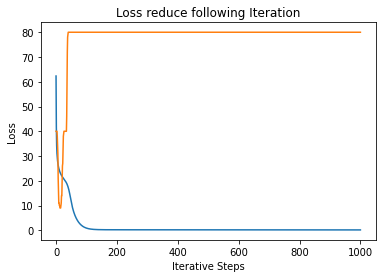

In [7]:
#VISUALIZATION
def painter(loss,accuracy,scales):
	fig = plt.figure()
	x = np.linspace(0, scales, scales)
	plt.plot(x, loss, label='Loss')
	plt.plot(x, accuracy_data, label='Accuracy')
	plt.xlabel('Iterative Steps')
	plt.ylabel('Loss')
	plt.title('Loss reduce following Iteration')
	plt.savefig('Result_tain.png')
	#plt.show()
painter(loss_data,accuracy_data,steps)


In [8]:
#TEST MODEL
x_test = data[40:60,:4]
y_test = data[40:60,-1]
N = len(y_test)

y_test = one_hot(y_test).reshape((N,1))

out_OL = ForwardPropagation(x_test,hws,ows,train=False)
print('------------ TEST Result ------')
Cost(out_OL,y_test,train=False)
print('------------ TEST Result ------')


------------ TEST Result ------
Loss:0.05949899996475772
Accuracy:100.0%
------------ TEST Result ------
